## Formulación del problema.

* Se trata de un conjunto de datos creado a partir de una institución de educación superior (obtenido de varias bases de datos diferentes) relacionado con estudiantes matriculados en diferentes carreras de grado, como agronomía, diseño, educación, enfermería, periodismo, administración, servicio social y tecnologías. El conjunto de datos incluye información conocida en el momento de la inscripción del estudiante (trayectoria académica, datos demográficos y factores socioeconómicos) y el rendimiento académico de los estudiantes al finalizar el primer y segundo semestre. Los datos se utilizan para construir modelos de clasificación para predecir el abandono de los estudiantes y el éxito académico. El problema se formula como una tarea de clasificación de tres categorías, en la cual hay un desequilibrio importante hacia una de las clases.

* #### Link: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

### Análisis de datos.

In [1]:
import pandas as pd
from IPython.display import display
import seaborn as sns

In [2]:
data = pd.read_csv("./data_student.csv", sep=";")

In [3]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
data.shape

(4424, 37)

In [5]:
print(data.columns.values)

['Marital status' 'Application mode' 'Application order' 'Course'
 'Daytime/evening attendance\t' 'Previous qualification'
 'Previous qualification (grade)' 'Nacionality' "Mother's qualification"
 "Father's qualification" "Mother's occupation" "Father's occupation"
 'Admission grade' 'Displaced' 'Educational special needs' 'Debtor'
 'Tuition fees up to date' 'Gender' 'Scholarship holder'
 'Age at enrollment' 'International' 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)' 'Curricular units 1st sem (grade)'
 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)' 'Curricular units 2nd sem (grade)'
 'Curricular units 2nd sem (without evaluations)' 'Unemployment rate'
 'Inflation rate' 'GDP' 'Target']


In [6]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [7]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
data.duplicated().sum()

0

In [9]:
for col in data.columns:
    print(col)    
    print(data[col].unique())
    print()

Marital status
[1 2 4 3 5 6]

Application mode
[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]

Application order
[5 1 2 4 3 6 9 0]

Course
[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]

Daytime/evening attendance	
[1 0]

Previous qualification
[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]

Previous qualification (grade)
[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]

Nacionalit

In [10]:
for col in data.columns:
    print(col)    
    print(data[col].nunique())
    print()

Marital status
6

Application mode
18

Application order
8

Course
17

Daytime/evening attendance	
2

Previous qualification
17

Previous qualification (grade)
101

Nacionality
21

Mother's qualification
29

Father's qualification
34

Mother's occupation
32

Father's occupation
46

Admission grade
620

Displaced
2

Educational special needs
2

Debtor
2

Tuition fees up to date
2

Gender
2

Scholarship holder
2

Age at enrollment
46

International
2

Curricular units 1st sem (credited)
21

Curricular units 1st sem (enrolled)
23

Curricular units 1st sem (evaluations)
35

Curricular units 1st sem (approved)
23

Curricular units 1st sem (grade)
805

Curricular units 1st sem (without evaluations)
11

Curricular units 2nd sem (credited)
19

Curricular units 2nd sem (enrolled)
22

Curricular units 2nd sem (evaluations)
30

Curricular units 2nd sem (approved)
20

Curricular units 2nd sem (grade)
786

Curricular units 2nd sem (without evaluations)
10

Unemployment rate
10

Inflation rate
9

GD

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## Construcción y evaluación de modelos
### K Nearest Neighbors

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors

In [13]:
X = data.drop(["Target"], axis=1)
Y = data["Target"]

In [14]:
X = X.astype("float")

In [15]:
X = (X-X.min())/(X.max()-X.min())

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [17]:
clf = neighbors.KNeighborsClassifier().fit(x_train, y_train)

In [18]:
score = clf.score(x_test, y_test)

In [19]:
score

0.656497175141243

* ### Cross validation

In [20]:
knn = neighbors.KNeighborsClassifier()

In [21]:
cross_score = cross_val_score(knn,
                              X,Y,
                             cv=5)

In [22]:
accuracy_score = cross_score.sum()/len(cross_score)

In [23]:
accuracy_score

0.6702050259477976

* #### El modelo de KNN nos da una precisión de 67% en las predicciones.

### Support vector machines

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = [
    {
        "kernel": ["rbf"],
        "gamma": [1e-4,1e-3,1e-2,0.1,0.2,0.5],
        "C": [1,10,100,1000,10000]
    },
    {
        "kernel":["linear"],
        "C": [1,10,100,1000]
    },
    {
        "kernel":["poly"],
        "C": [1,10,100,1000]
    }
]

In [26]:
svc_clf = GridSearchCV(SVC(decision_function_shape="ovr"),
                      param_grid=parameters, cv=5)
svc_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}])

In [27]:
svc_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [28]:
y_pred = svc_clf.predict(x_test)

In [29]:
y_pred

array(['Graduate', 'Dropout', 'Graduate', 'Graduate', 'Enrolled',
       'Enrolled', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Enrolled', 'Dropout', 'Dropout', 'Dropout', 'Enrolled',
       'Graduate', 'Enrolled', 'Dropout', 'Graduate', 'Enrolled',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Enrolled', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Enrolled', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Enrolled', 'Dropout', 'Graduate',
       'Enrolled', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Enrolled', 'Enrolled', 'Graduate', 'Enrolled', 'Dropout',
       'Graduate', 'Enrolled', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Graduate', 'Dropout', 'Enrolled', 'Dropout',
       'Graduate',

In [30]:
score = svc_clf.score(x_test, y_test)

In [31]:
score

0.7740112994350282

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.82      0.74      0.78       284
    Enrolled       0.51      0.44      0.47       151
    Graduate       0.82      0.91      0.86       450

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.70       885
weighted avg       0.77      0.77      0.77       885



In [34]:
mat = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

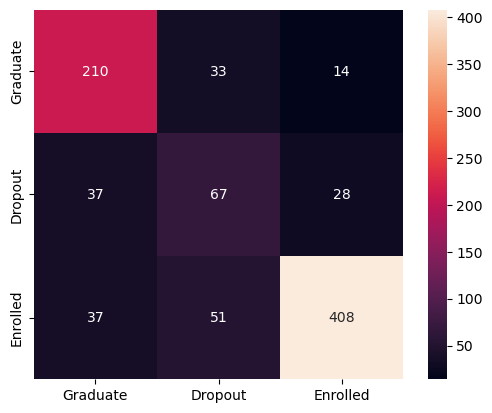

In [35]:
sns.heatmap(mat.T, square=True, annot=True, fmt="d",
           cbar=True,xticklabels=y_test.unique(),
           yticklabels=y_test.unique())

* #### El modelo de SVM nos da una precisión de 77,4% en las predicciones.